In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.datasets import load_breast_cancer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target


df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Text(0.5, 1.0, 'Distribution of Target Classes (0 = Benign, 1 = Malignant)')

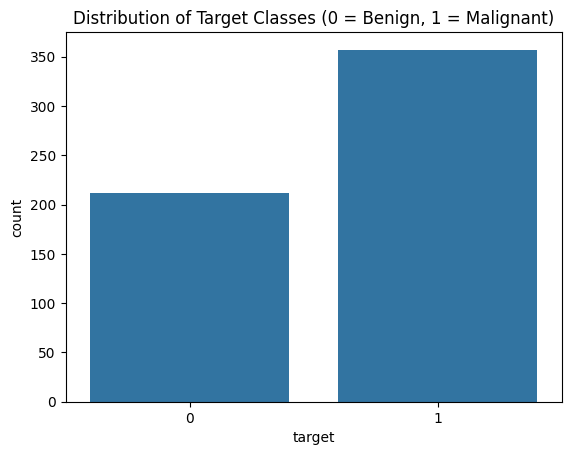

In [6]:
sns.countplot(x='target', data=df)

plt.title('Distribution of Target Classes (0 = Benign, 1 = Malignant)')

In [7]:
X = df[['mean radius', 'mean texture']]

y = df['target']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_pred = model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9122807017543859

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        43
           1       0.92      0.94      0.93        71

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.91       114
weighted avg       0.91      0.91      0.91       114



Text(0.5, 1.0, 'Confusion Matrix')

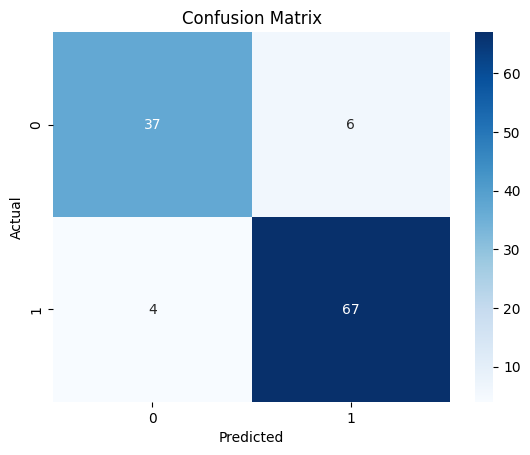

In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")

plt.xlabel('Predicted')

plt.ylabel('Actual')

plt.title('Confusion Matrix')

c:\Users\20101\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'Mean Radius')

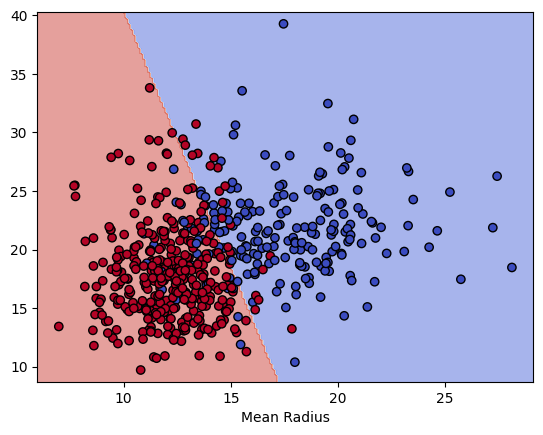

In [14]:
# Create a meshgrid

x_min, x_max = X['mean radius'].min() - 1, X['mean radius'].max() + 1

y_min, y_max = X['mean texture'].min() - 1, X['mean texture'].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))


# Predict for each point in the grid

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

# (1,3) (2,4) (5,6) (5 ,7)

# [

# [1 3]

# [2 4]

# [5 6]

# [5 7]

#]

# Plot decision boundary

plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)

plt.scatter(X['mean radius'], X['mean texture'], c=y, edgecolors='k', cmap=plt.cm.coolwarm)

plt.xlabel('Mean Radius')

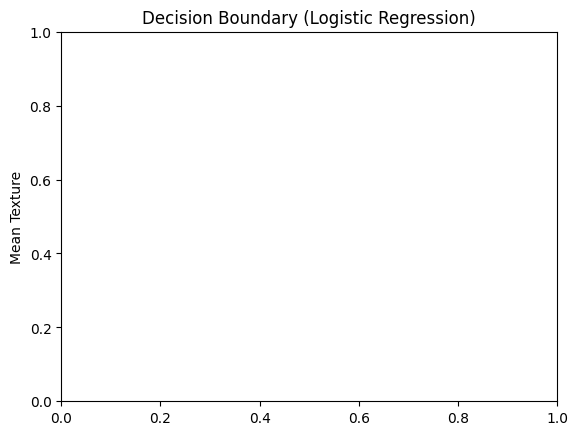

In [15]:
plt.ylabel('Mean Texture')

plt.title('Decision Boundary (Logistic Regression)')

plt.show()

In [17]:
print("Theta (coefficients):", model.coef_)

print("Theta0 (intercept):", model.intercept_)

Theta (coefficients): [[-0.97957826 -0.22361619]]
Theta0 (intercept): [18.84565222]
